In [5]:
import pickle
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [9]:
print('x_train shap:', x_train.shape)
print('y_train shap:', y_train.shape)
print('x_test shap:', x_test.shape)
print('y_test shap:', y_test.shape)

x_train shap: (50000, 32, 32, 3)
y_train shap: (50000, 1)
x_test shap: (10000, 32, 32, 3)
y_test shap: (10000, 1)


In [10]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

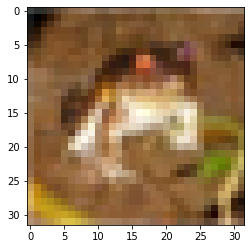

In [11]:
img= plt.imshow(x_train[0])

In [12]:
print('The image label is: ', y_train[0] )

The image label is:  [6]


In [13]:
#Label the classes
classifications= ['airplane', 'automobile', 'bird','cat', 'deer', 'dog', 'frog', 'horse', 
'ship', 'truck']

In [14]:
print('The image class is:', classifications[y_train[0][0]])

The image class is: frog


In [15]:
y_train_new_label= to_categorical(y_train)
y_test_new_label= to_categorical(y_test)

In [16]:
print(y_train_new_label)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [17]:
print(y_train_new_label)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [18]:
print(y_train_new_label[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [19]:
x_train =x_train /255
x_test= x_test /255

In [20]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [22]:
# Create models architectures
model= Sequential()

# add the first layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32, 32, 3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1000, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(500, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(250, activation='relu'))

model.add(Dense(10, activation='softmax'))



In [23]:
#Compile the model
model.compile(loss= 'categorical_crossentropy', 
optimizer='adam',
metrics=['accuracy']
)

In [24]:
#Train the model

hist=model.fit(x_train, y_train_new_label,
batch_size=256,
epochs=10,
validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 56s 356ms/step - loss: 1.7729 - accuracy: 0.3433 - val_loss: 1.4106 - val_accuracy: 0.4977
Epoch 2/10
157/157 [==============================] - 46s 290ms/step - loss: 1.3857 - accuracy: 0.4992 - val_loss: 1.2311 - val_accuracy: 0.5659
Epoch 3/10
157/157 [==============================] - 43s 274ms/step - loss: 1.2243 - accuracy: 0.5590 - val_loss: 1.2702 - val_accuracy: 0.5553
Epoch 4/10
157/157 [==============================] - 43s 274ms/step - loss: 1.1165 - accuracy: 0.6022 - val_loss: 1.0959 - val_accuracy: 0.6142
Epoch 5/10
157/157 [==============================] - 43s 273ms/step - loss: 1.0120 - accuracy: 0.6430 - val_loss: 1.0867 - val_accuracy: 0.6190
Epoch 6/10
157/157 [==============================] - 42s 269ms/step - loss: 0.9358 - accuracy: 0.6695 - val_loss: 1.0345 - val_accuracy: 0.6410
Epoch 7/10
157/157 [==============================] - 44s 281ms/step - loss: 0.8331 - accuracy: 0.7059 - val_loss: 1.0291 - val_ac

In [25]:
model.evaluate(x_test, y_test_new_label)[1]

313/313 [==============================] - 8s 24ms/step - loss: 1.0285 - accuracy: 0.6563


0.6563000082969666

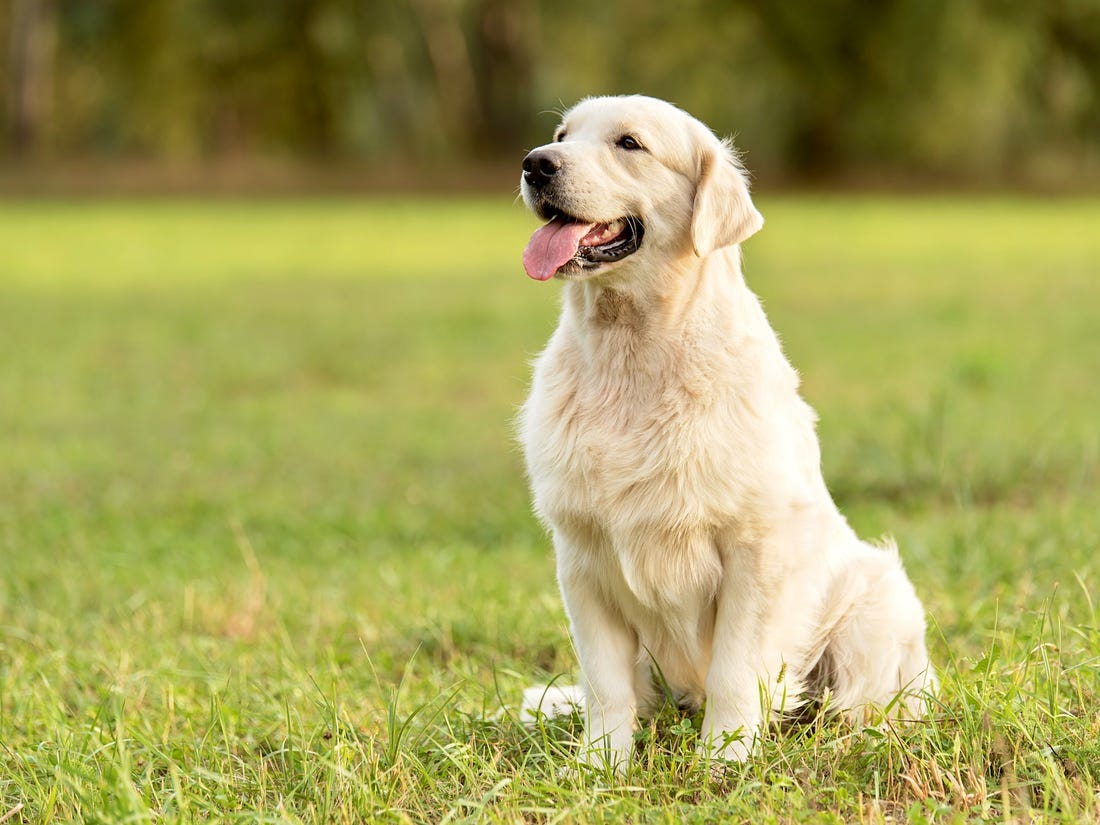

In [26]:
from IPython.display import Image
Image(filename='dog_test.jpeg')

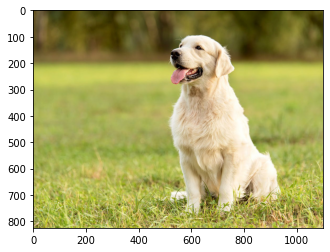

In [27]:
test_img = plt.imread('dog_test.jpeg')
plt.imshow(test_img)

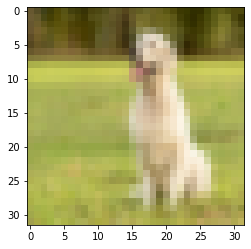

In [28]:
from skimage.transform import resize

resize_img= resize(test_img, (32, 32,3))
plt.imshow(resize_img)

In [29]:
# Test if mode can predict this is a dog

# get model predication
predictions = model.predict(np.array([resize_img]))

# show the predictions
predictions

array([[9.6857734e-04, 2.0192507e-05, 5.8052993e-01, 2.4889683e-02,
        2.6731861e-01, 6.8765186e-02, 3.8066618e-03, 5.3638283e-02,
        2.1596996e-05, 4.1326301e-05]], dtype=float32)

In [30]:
list_index= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x= predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
# show sorted labels in decending order
print(list_index)

[2, 4, 5, 7, 3, 6, 0, 9, 8, 1]


In [31]:
# show the first 5 classifications
for i in range(5):
    print(classifications[list_index[i]], "-", predictions[0][list_index[i]] * 100, "%")

bird - 58.052992820739746 %
deer - 26.731860637664795 %
dog - 6.876518577337265 %
horse - 5.36382831633091 %
cat - 2.4889683350920677 %
